<h1>Adidas Sales Dataset<h5>source from <a href="https://data.world/stellabigail/adidas-us-sales-datasets">https://data.world/stellabigail/adidas-us-sales-datasets</a></h5><br>
<body></h1>
<h2>Analysed by <a href="www.linkedin.com/in/sui-lun-chan">Jamie Chan</a></h2>

    It is a python project to showcase the knowledge about pandas, matplotlib and seaborn as well as the basic knowledge of HTML. The Adidas data set is downloaded from data.world.This project is visualsing the sales performance in 2020 and 2021 in the USA. The content included data cleaning, data ETL, data modelling, data visualisation and statistical analysis. 
</body>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

<h3>Import Data by pandas</h3>

In [2]:
df = pd.read_csv("/Users/jamie/Downloads/Adidas US Sales Datasets.csv")

<h3>Data Cleaning:</h3>
    <ul>Turning the data to the correct datatype</ul>
    <ol>1. Turn the Invoce Date cloumn to datetime datatype</ol>
    <ol>2.Dropping the symbol and turn the numerical data to int or float</ol>
   
    

In [3]:
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], format="%d/%m/%Y")
df["Price per Unit"] = df["Price per Unit"].str.replace("$","").astype(float)
df["Total Sales"] = df["Total Sales"].str.replace("$", "").str.replace(",", "").astype(float)
df["Operating Profit"] = df["Operating Profit"].str.replace("$", "").str.replace(",", "").astype(float)
df["Operating Margin"] = df["Operating Margin"].str.replace("%","").astype(float) / 100
df["Units Sold"] = df["Units Sold"].str.replace(",","").astype(int)

/var/folders/c_/vs778dgn3lgdd5pnlw2f4qz40000gn/T/ipykernel_72309/2128143986.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price per Unit"] = df["Price per Unit"].str.replace("$","").astype(float)
/var/folders/c_/vs778dgn3lgdd5pnlw2f4qz40000gn/T/ipykernel_72309/2128143986.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Total Sales"] = df["Total Sales"].str.replace("$", "").str.replace(",", "").astype(float)
/var/folders/c_/vs778dgn3lgdd5pnlw2f4qz40000gn/T/ipykernel_72309/2128143986.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as liter

<h3>Ststistical summary of Operating Margin by Sales Method</h3> <br>
<body>The boxplot shows that "Online"'s profit out of every dollar of sales is the highest among the three sales methods.<br> *The higher the operating margin, the higher the profit earned on every dollar of sales.</body>

Text(0.5, 1.0, '')

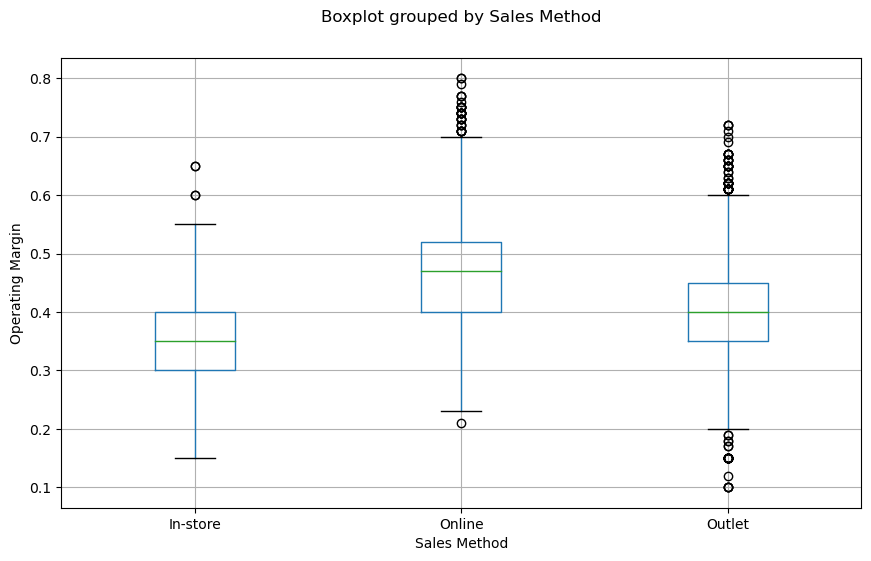

In [4]:
margin_performance = df.boxplot(column="Operating Margin", by="Sales Method", figsize=(10,6))
margin_performance.set_ylabel("Operating Margin")
margin_performance.set_title("")

<h3>Data Modelling</h3><br>
<body>Creating a pivot table to show the values of all the numerical columns<body>

In [5]:
df['Year'] = df['Invoice Date'].dt.year

In [6]:
df['Date'] = df['Invoice Date'].dt.strftime('%m-%d')

In [7]:
pivot_table = pd.pivot_table(df, index='Date', columns='Year', values="Operating Profit")
pivot_table = pivot_table.cumsum()

<h3> Data Visualisation</h3>

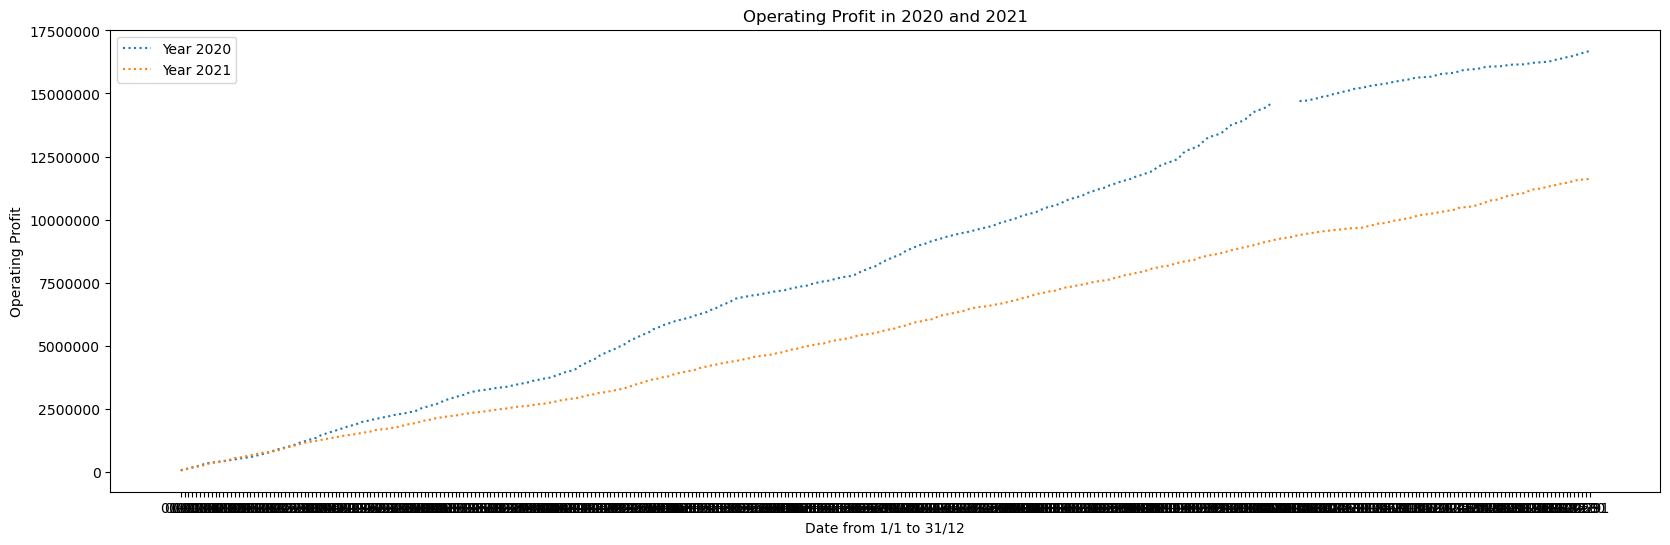

In [8]:
plt.figure(figsize=(20, 6))
line = plt.plot(pivot_table, linestyle = 'dotted')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Date from 1/1 to 31/12')
plt.ylabel('Operating Profit')
plt.title('Operating Profit in 2020 and 2021')
plt.legend([f'Year {year}' for year in pivot_table.columns])
plt.show()